In [2]:
import pandas as pd

data = pd.read_csv('data_v2.csv', encoding='latin1')

In [ ]:
print(data)
data.head()

In [4]:
data.tail()

,hz,ampliture,y
262139,7499.427795,5.301734,3
262140,7499.542236,6.235771,3
262141,7499.656677,6.966210,3
262142,7499.771118,4.212205,3
262143,7499.885559,8.278224,3


In [5]:
import seaborn as sns

sns.set(style='ticks', color_codes=True)
g = sns.pairplot(data, hue='y', palette='husl')

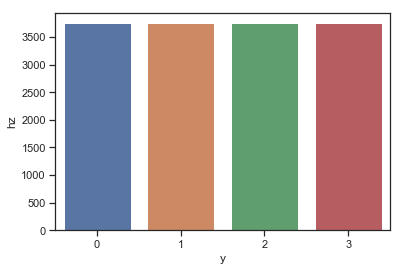

In [6]:
sns.barplot(data['y'], data['hz'], ci=None)

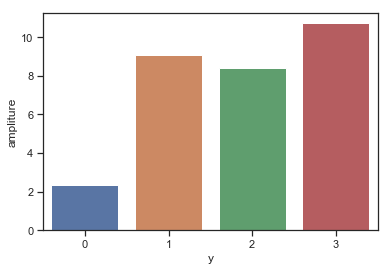

In [7]:
sns.barplot(data['y'], data['ampliture'], ci=None)

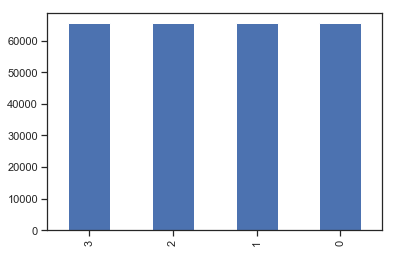

In [8]:
import matplotlib.pyplot as plt

data['y'].value_counts().plot(kind='bar')

In [9]:
from sklearn.model_selection import train_test_split

data_X = data[['hz', 'ampliture']].values
data_y = data['y'].values

print(data_X[:5])
print(data_y[:5])

[[0.00000000e+00 5.84564430e+03]
 [1.14440918e-01 2.68892458e+02]
 [2.28881836e-01 2.59570802e+02]
 [3.43322754e-01 2.55457923e+02]
 [4.57763672e-01 2.67371884e+02]]
[0 0 0 0 0]


In [10]:
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)

In [44]:
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

model=Sequential()
model.add(Dense(24, input_shape=(2,),activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

model.summary()

history=model.fit(X_train,y_train, batch_size=200, epochs=50, validation_data=(X_test, y_test))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 24)                72        
_________________________________________________________________
dense_101 (Dense)            (None, 48)                1200      
_________________________________________________________________
dense_102 (Dense)            (None, 64)                3136      
_________________________________________________________________
dense_103 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_104 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_105 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_106 (Dense)            (None, 48)              

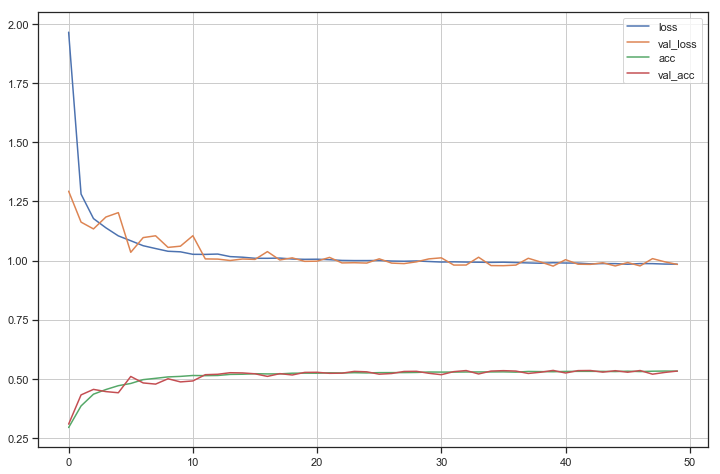

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.grid()
plt.show()

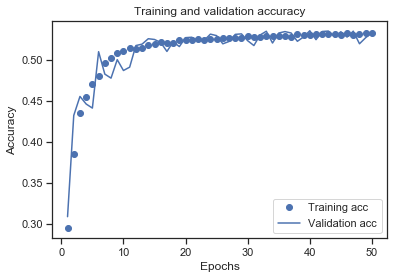

In [46]:
plt.clf()

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()